# Data analysis

In [1]:
import xarray as xr
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
from matplotlib import rcParams #For changing text properties
import cmocean #A package with beautiful colormaps
from cartopy import crs as ccrs #Useful for plotting maps
import cartopy.util #Requires separate import
from cartopy.util import add_cyclic_point
import cartopy.feature as cf
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib.path as mpath
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1 import make_axes_locatable

## Compute percentile/quantile

In [3]:
# define data values
# using the way below will create a list
X = [2, 0, 17, 14, 12, 8, 18, 16, 1, 19]
print(type(X),len(X),X)

<class 'list'> 10 [2, 0, 17, 14, 12, 8, 18, 16, 1, 19]


# using np.percentile and np.quantile will give the same results
## using np.percentile to compute the q-th percentile of the data along the specified axis. 
### numpy.percentile(a, q, axis=None, out=None, overwrite_input=False, method='linear', keepdims=False, *, weights=None, interpolation=None)
### where q values must be between 0 and 100 inclusive.
### https://numpy.org/doc/stable/reference/generated/numpy.percentile.html
## using np.quantile to compute the q-th quantile of the data along the specified axis.
### numpy.quantile(a, q, axis=None, out=None, overwrite_input=False, method='linear', keepdims=False, *, weights=None, interpolation=None)
### where q values must be between 0 and 1 inclusive.
### https://numpy.org/doc/stable/reference/generated/numpy.quantile.html

## Chosing different methods to compute quantile or percentile
### https://en.wikipedia.org/wiki/Quartile

In [4]:
q25 = np.percentile(X,25)
q50 = np.percentile(X,50)
q75 = np.percentile(X,75)
print(q25,q50,q75)

3.5 13.0 16.75


In [5]:
q25 = np.quantile(X,0.25)
q50 = np.quantile(X,0.5)
q75 = np.quantile(X,0.75)
print(q25,q50,q75)

3.5 13.0 16.75


In [18]:
q25 = np.quantile(X,0.25,method='nearest')
q50 = np.quantile(X,0.5,method='midpoint')
q75 = np.quantile(X,0.75,method='nearest')
print(q25,q50,q75)

2 13.0 17


### Comput mean and standard deviation

In [6]:
X_mean = np.mean(X)
print(X_mean)

X_std = np.std(X)
print(X_std)

10.7
7.029224708315989


In [7]:
# Read data
DIR = '/nfs/spare11/env315/data/'
datafile = DIR+'era5_u1060_daily_1980-2019.nc'
data = xr.open_mfdataset(datafile).compute()
data

<xarray.Dataset> Size: 175kB
Dimensions:              (time: 14610)
Coordinates:
    lat                  float64 8B 60.0
    plev                 float64 8B 1e+03
  * time                 (time) datetime64[ns] 117kB 1980-01-01T09:00:00 ... ...
Data variables:
    u_component_of_wind  (time) float32 58kB 33.96 37.4 38.93 ... 40.91 41.23

In [8]:
# extract the variable
data = data.u_component_of_wind
data

<xarray.DataArray 'u_component_of_wind' (time: 14610)> Size: 58kB
array([33.964096, 37.398537, 38.92926 , ..., 41.941204, 40.91121 ,
       41.22743 ], dtype=float32)
Coordinates:
    lat      float64 8B 60.0
    plev     float64 8B 1e+03
  * time     (time) datetime64[ns] 117kB 1980-01-01T09:00:00 ... 2019-12-31T0...

### Learn to select data in specific years or months

In [9]:
print(data.time.dt.year)
print(data.time.dt.month)
print(data.time.dt.day)

<xarray.DataArray 'year' (time: 14610)> Size: 117kB
array([1980, 1980, 1980, ..., 2019, 2019, 2019])
Coordinates:
    lat      float64 8B 60.0
    plev     float64 8B 1e+03
  * time     (time) datetime64[ns] 117kB 1980-01-01T09:00:00 ... 2019-12-31T0...
Attributes:
    standard_name:  time
    axis:           T
    cell_methods:   time: mean
<xarray.DataArray 'month' (time: 14610)> Size: 117kB
array([ 1,  1,  1, ..., 12, 12, 12])
Coordinates:
    lat      float64 8B 60.0
    plev     float64 8B 1e+03
  * time     (time) datetime64[ns] 117kB 1980-01-01T09:00:00 ... 2019-12-31T0...
Attributes:
    standard_name:  time
    axis:           T
    cell_methods:   time: mean
<xarray.DataArray 'day' (time: 14610)> Size: 117kB
array([ 1,  2,  3, ..., 29, 30, 31])
Coordinates:
    lat      float64 8B 60.0
    plev     float64 8B 1e+03
  * time     (time) datetime64[ns] 117kB 1980-01-01T09:00:00 ... 2019-12-31T0...
Attributes:
    standard_name:  time
    axis:           T
    cell_methods:   tim

In [10]:
# Extract data in specific month
u_winter = data.sel(time=data.time.dt.month.isin([1]))
u_winter

<xarray.DataArray 'u_component_of_wind' (time: 1240)> Size: 5kB
array([33.964096, 37.398537, 38.92926 , ..., 13.104248, 16.928404,
       18.338316], dtype=float32)
Coordinates:
    lat      float64 8B 60.0
    plev     float64 8B 1e+03
  * time     (time) datetime64[ns] 10kB 1980-01-01T09:00:00 ... 2019-01-31T09...

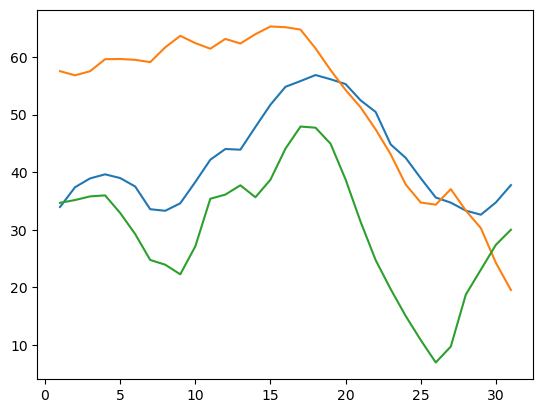

In [11]:
plt.plot(np.arange(1,32),u_winter.sel(time=u_winter.time.dt.year.isin([1980])))
plt.plot(np.arange(1,32),u_winter.sel(time=u_winter.time.dt.year.isin([1981])))
plt.plot(np.arange(1,32),u_winter.sel(time=u_winter.time.dt.year.isin([1982])))

In [21]:
# compute xarray data mean, standard deviation, median, lower quartile, and upper quartile
u_winter_mean = np.mean(u_winter.values)
print('mean: ',u_winter_mean)
u_winter_mean = u_winter.mean(dim='time')
print('mean: ',u_winter_mean)
print("****************")
u_winter_std = np.std(u_winter.values)
print('std: ',u_winter_std)
u_winter_std = u_winter.std(dim='time')
print('std: ',u_winter_std)
print("****************")
u_winter_median = np.quantile(u_winter.values,0.5)
print('median: ',u_winter_median)
u_winter_median = u_winter.quantile(0.5)
print('median: ',u_winter_median)
print("****************")
u_winter_q25 = np.quantile(u_winter.values,0.25)
print('Q1: ',u_winter_q25)
u_winter_q25 = u_winter.quantile(0.25)
print('Q1: ',u_winter_q25)
print("****************")
u_winter_q75 = np.quantile(u_winter.values,0.75)
print('Q3: ',u_winter_q75)
u_winter_q75 = u_winter.quantile(0.75)
print('Q3: ',u_winter_q75)

mean:  31.843737
mean:  <xarray.DataArray 'u_component_of_wind' ()> Size: 4B
array(31.843737, dtype=float32)
Coordinates:
    lat      float64 8B 60.0
    plev     float64 8B 1e+03
****************
std:  19.55139
std:  <xarray.DataArray 'u_component_of_wind' ()> Size: 4B
array(19.55139, dtype=float32)
Coordinates:
    lat      float64 8B 60.0
    plev     float64 8B 1e+03
****************
median:  34.69362
median:  <xarray.DataArray 'u_component_of_wind' ()> Size: 8B
array(34.69362068)
Coordinates:
    quantile  float64 8B 0.5
****************
Q1:  18.294823
Q1:  <xarray.DataArray 'u_component_of_wind' ()> Size: 8B
array(18.29482365)
Coordinates:
    quantile  float64 8B 0.25
****************
Q3:  46.25988
Q3:  <xarray.DataArray 'u_component_of_wind' ()> Size: 8B
array(46.25988102)
Coordinates:
    quantile  float64 8B 0.75


## Boxplots
#### https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html

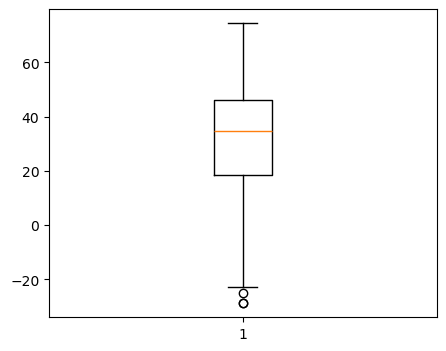

In [10]:
fig = plt.figure(figsize =(5, 4))

# Creating boxplot plot
plt.boxplot(u_winter)

# show plot
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x7f84f7eb0f20>,
 'caps': [<matplotlib.lines.Line2D at 0x7f84f7eb1be0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f84f7eb1a00>],
 'medians': [<matplotlib.lines.Line2D at 0x7f84f7eb2ae0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f84f7eb0dd0>],
 'means': []}

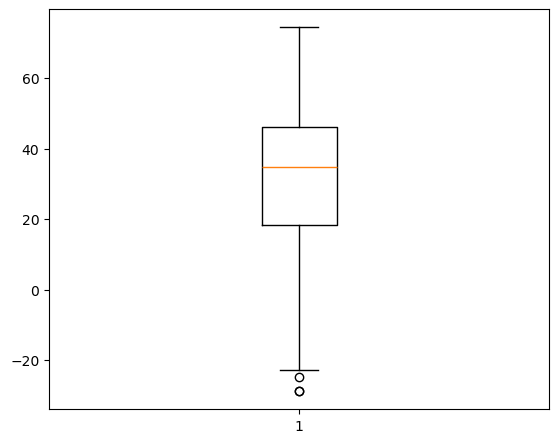

In [58]:
fig = plt.figure(figsize =(5, 4))
ax = fig.add_axes([0, 0, 1, 1])
boxplot_data = ax.boxplot(u_winter.values) 
boxplot_data

In [59]:
print(boxplot_data['medians'][0].get_ydata())
print(np.percentile(u_winter,50))

[34.69362068 34.69362068]
34.69362


In [60]:
print(boxplot_data['boxes'][0].get_ydata()[0:4:2])
print(np.percentile(u_winter,25),np.percentile(u_winter,75))

[18.29482365 46.25988102]
18.294823 46.25988


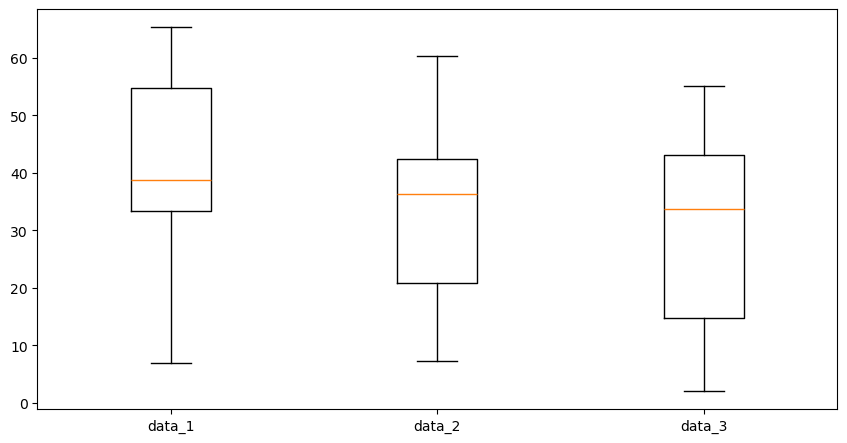

In [46]:
data_1 = u_winter.sel(time=u_winter.time.dt.year.isin([1980,1981,1982])).values
data_2 = u_winter.sel(time=u_winter.time.dt.year.isin([1990,1991,1992])).values
data_3 = u_winter.sel(time=u_winter.time.dt.year.isin([2010,2011,2012])).values
data_plot = [data_1, data_2, data_3]
fig = plt.figure(figsize =(8, 4))

# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])

# Creating plot
bp = ax.boxplot(data_plot)

# x-axis labels
ax.set_xticklabels(['data_1', 'data_2', 'data_3'])
# show plot
plt.show()

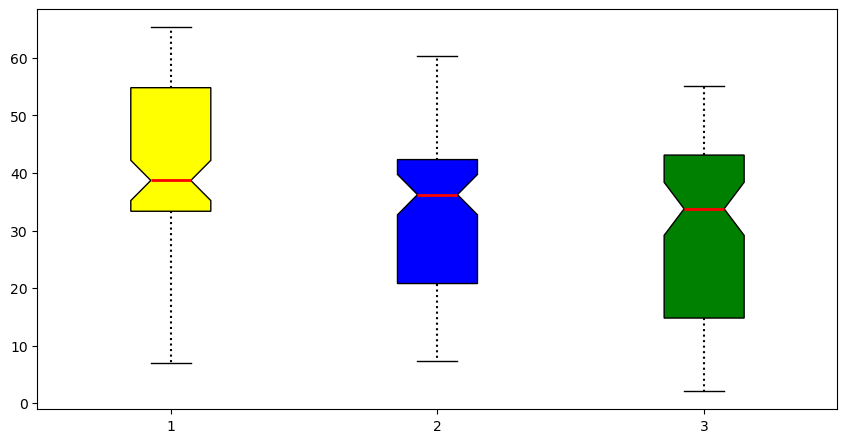

In [43]:
data_1 = u_winter.sel(time=u_winter.time.dt.year.isin([1980,1981,1982])).values
data_2 = u_winter.sel(time=u_winter.time.dt.year.isin([1990,1991,1992])).values
data_3 = u_winter.sel(time=u_winter.time.dt.year.isin([2010,2011,2012])).values
data_plot = [data_1, data_2, data_3]

fig = plt.figure(figsize =(8, 4))
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])

# Creating plot
# bp = ax.boxplot(data_plot, vert = 0)
# bp = ax.boxplot(data_plot, patch_artist = True,
#                 vert = 1)
bp = ax.boxplot(data_plot, patch_artist = True,
                notch ='True', vert = 1)

colors = ['yellow', 'blue', 'green']

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# whiskers styles
for whisker in bp['whiskers']:
    whisker.set(color ='k',
                linewidth = 1.5,
                linestyle =":")

# medians styles
for median in bp['medians']:
    median.set(color ='red',
               linewidth = 2)


# show plot
plt.show()